# $\text{3.1 Synthetic numerical example}$

Importing libraries

In [18]:
import numpy as np 
# import cupy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 
from sklearn.decomposition import TruncatedSVD
import cvxpy as cp

Creating synthetic inliers: ***A***, outliers: ***B***

In [19]:
# Create random matrices A: inlier
A =     np.random.rand(20, 200);                   #print(f'>> A{A.shape}:\n', A)
# Create random matrices B: outlier
B = 100*np.random.rand(20,  50);                   #print(f'>> B{B.shape}:\n', B)
# Create random matrices N: noise
N = 0.9*np.random.rand(20, 200);

A.shape, B.shape, N.shape

((20, 200), (20, 50), (20, 200))

Creating dataset ***D*** from **A**, ***B*** and ***N*** \
$D = [B (A+N)]T$ \
To simplify the exposition and notation, it is assumed without loss of generality that $T$ in Data Model 1 is the identity matrix, i.e, $D = [B A]$

>> D(20, 250):



<Axes: >

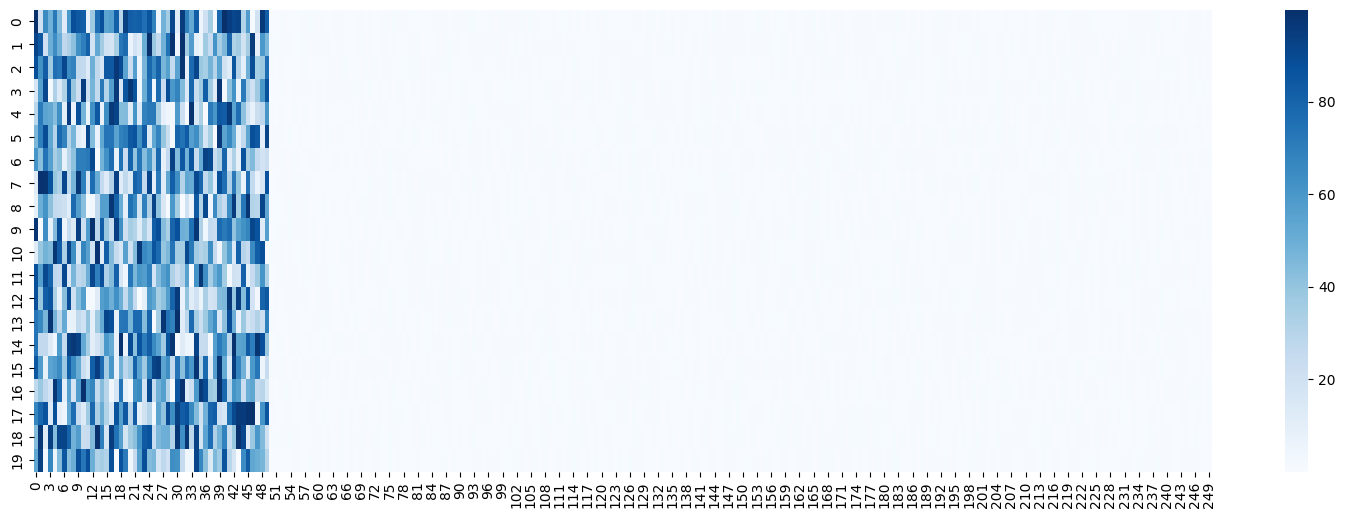

In [20]:
# Concatenate B(A+N)
D = np.hstack((B, A));   print(f'>> D{D.shape}:\n')

# plotting the heatmap 
plt.figure(figsize=(19,6))
sn.heatmap(data = D, cmap='Blues')

Create a permutation matrix T

>> D(20, 250):



<Axes: >

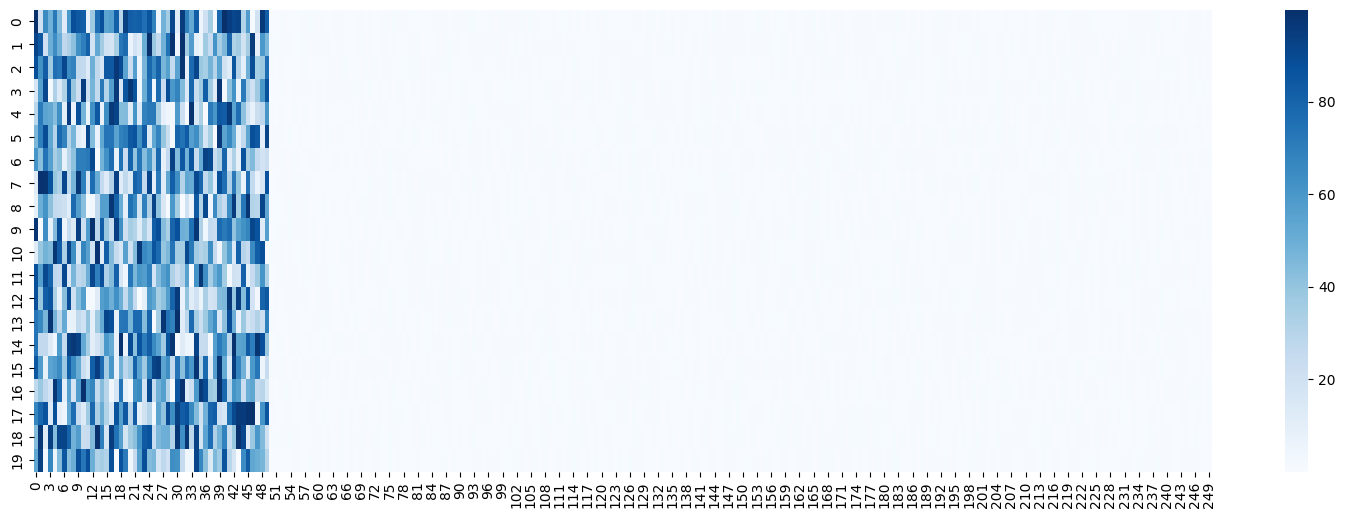

In [21]:
T = np.eye(D.shape[1])
D = D @ T;                           print(f'>> D{D.shape}:\n')

plt.figure(figsize=(19,6))
sn.heatmap(data = D, cmap="Blues")

Step 1: Data Preprocessing

In [ ]:
# D_new = D

>> D_new(20, 250)


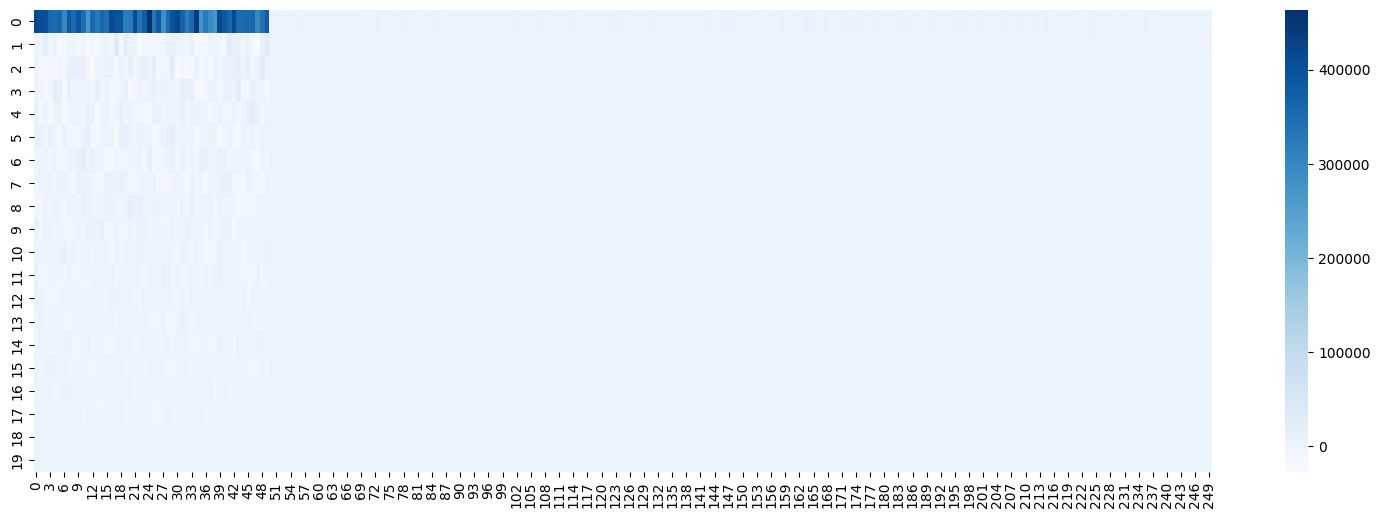

[1603.08312518  308.13690904  289.85893157  268.00946566  258.3835499
  250.82105898  234.96261326  228.5774386   211.38452915  200.66186967
  192.76166816  180.11023151  164.62636391  159.20745537  149.64701658
  145.70612824  131.41166461  115.6502698   100.49787413   95.22595611]


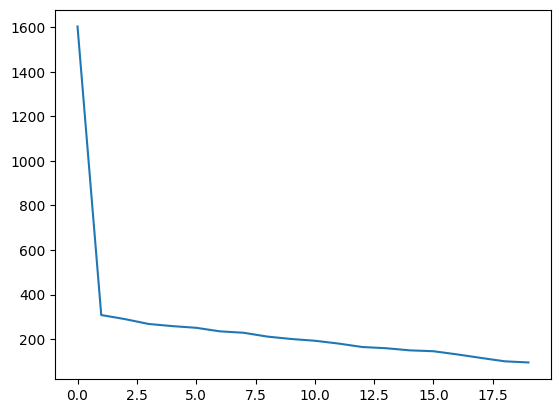

In [31]:
svd = TruncatedSVD(n_components=250);         # print('\n>> svd object:\n', svd)
Q = svd.fit_transform(D);                     # print('\n>> Q:\n', Q)
D_new = Q.T @ D;                               # print('\n>> D_new (Q.T @ D):\n', D_new, D_new.shape)

# Normalizing l-2 norm (opti`onal based on requirement)
# column_norms = np.linalg.norm(D_new, axis=0); #print('\n>> column_norms:\n', column_norms)
# D_new = D_new/column_norms;                   #print('\n>> D_new:\n', D_new, D_new.shape)

print(f'>> D_new{D_new.shape}')
plt.figure(figsize=(19,6))
sn.heatmap(data = D_new, cmap="Blues")
plt.show()

print(svd.singular_values_)
plt.plot(svd.singular_values_)
plt.show()

In [32]:
import cvxpy as cp # ADMM solver

# Assuming D_new is your data matrix after preprocessing (2,3)
M1, M2 = D_new.shape;                                             #print('>> M1, M2:\n', D_new.shape)
# This should be the number of non-zero singular values
rd = M1;                                                          #print('\n>> rd:\n', M1)

# Variable to be solved for
C = cp.Variable((rd, M2));                                        #print('\n>> C:\n', C)

# Defining the constraints
constraints = [cp.diag(C.T @ D_new) == 1];                        #print('\n>> constraints:\n', constraints)

# Defining the objective function
objective = cp.Minimize(cp.norm(C.T @ D_new, p=1));                 #print('\n>> objective:\n', objective)

# Defining the problem
problem = cp.Problem(objective, constraints);                     #print('\n>> problem:\n', problem)

# Solving the problem using ADMM solver
# Solving the problem using SCS solver (which uses ADMM)
problem.solve(solver=cp.SCS, verbose=True)

                                     CVXPY                                     
                                     v1.4.2                                    
(CVXPY) Mar 29 01:25:03 AM: Your problem has 5000 variables, 1 constraints, and 0 parameters.
(CVXPY) Mar 29 01:25:03 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 29 01:25:03 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 29 01:25:03 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Mar 29 01:25:03 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 29 01:25:03 AM: Compiling problem (target solver=SCS).
(CV

/home/23m1521/.conda/envs/cuda_env/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


3073.4160276022526

In [33]:
print(f"optimal objective value: {objective.value}")
C_star = C.value;     #print('\n>> C_star:\n', C.value)
print('C_star shape:', C_star.shape)
np.savetxt("c_star_svd250", C_star , delimiter=',')

optimal objective value: 3073.4160276022526
C_star shape: (20, 250)


Optimal values for C

In [34]:
C_star = np.loadtxt("./c_star_svd250", delimiter=",")
C_star

array([[ 1.04533023e-07,  1.61402766e-07,  1.54933963e-07, ...,
         1.80867871e-05,  4.79909692e-07,  1.42575744e-05],
       [ 1.70078329e-07, -9.38139181e-07,  8.74565841e-06, ...,
        -1.16241088e-04,  2.48906031e-04,  1.35847585e-05],
       [ 1.57400443e-06, -4.49288826e-06, -4.13550861e-06, ...,
        -2.78549863e-04,  1.61912485e-04,  2.68512175e-04],
       ...,
       [ 4.34049771e-06, -9.25829120e-06,  3.01217134e-05, ...,
        -4.99949632e-03, -1.37021889e-03,  4.88621976e-03],
       [ 3.83744127e-05,  4.93157557e-05,  2.71367205e-05, ...,
         1.40181683e-03,  1.41838757e-03, -1.54348700e-03],
       [ 4.44940300e-05, -6.22092559e-05, -7.23649709e-06, ...,
        -6.66519749e-03, -2.53741025e-03, -6.22702948e-03]])

Computing the innovation values

In [35]:
1/np.linalg.norm(D_new.T @ C_star[:,0], ord=1)

0.16041733898436364

x (250,):
 [0.16041734 0.11522624 0.1206952  0.12065286 0.09537487 0.09272065
 0.12969126 0.15917496 0.10019721 0.11620875 0.12536803 0.11800302
 0.13112618 0.11574198 0.10967547 0.10537334 0.11875409 0.1589453
 0.10477004 0.14204884 0.11956735 0.09230407 0.135738   0.09154073
 0.10638168 0.1407099  0.11104176 0.09416903 0.11744789 0.16081893
 0.14653762 0.13943708 0.13356065 0.1238331  0.12736564 0.12057448
 0.13390248 0.11066273 0.11980796 0.12882701 0.10041751 0.1195371
 0.11518036 0.12714695 0.11965631 0.11614309 0.11646528 0.10785678
 0.10891704 0.09596824 0.00151384 0.00189825 0.00116346 0.001136
 0.00182134 0.00113004 0.00162463 0.00168657 0.00180383 0.0011719
 0.00165935 0.00121322 0.00155703 0.00142312 0.00142695 0.00148243
 0.00139816 0.00140481 0.00151052 0.0014331  0.00140601 0.00124373
 0.00127401 0.00167821 0.00155984 0.00147468 0.00104742 0.00137374
 0.00118058 0.00168592 0.00128804 0.00094803 0.00133032 0.00158915
 0.0011655  0.00134068 0.00164093 0.00159529 0.00158598 

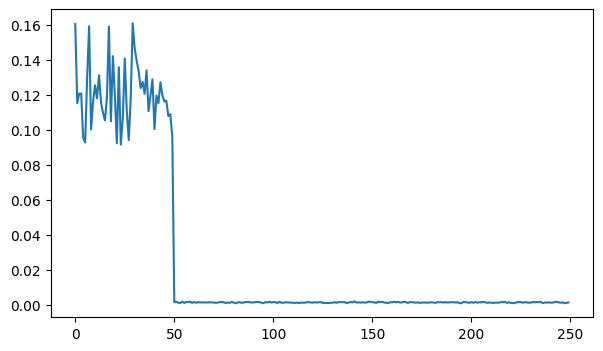

In [36]:
x = 1 / np.linalg.norm(D_new.T @ C_star, axis=0, ord=1);  print(f'x {x.shape}:\n', x)
plt.figure(figsize=(7,4))
plt.plot(x)

Text(0.5, 1.0, 'Innovation Values, p=1')

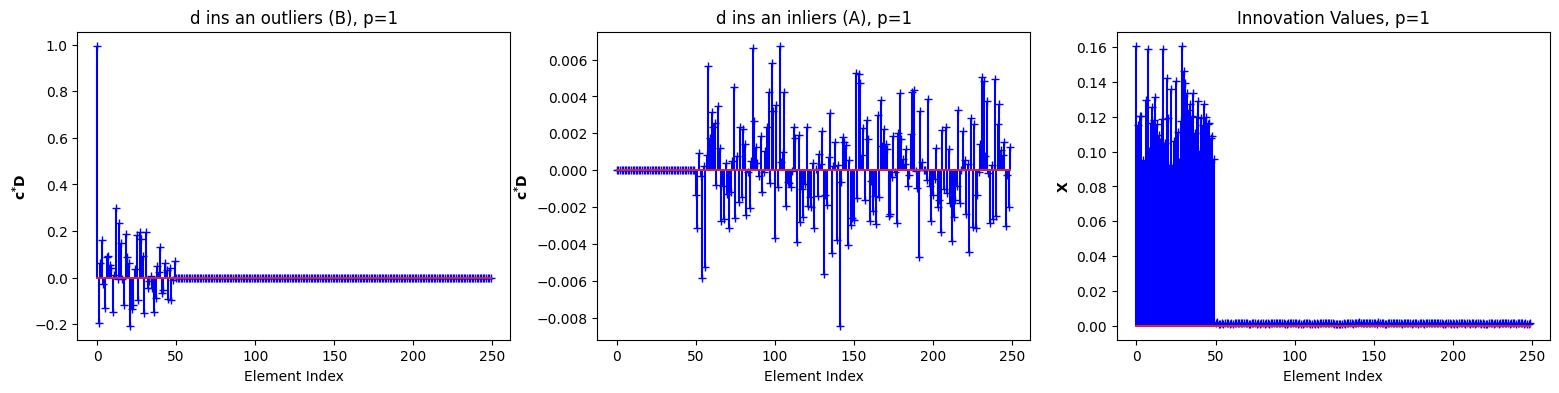

In [37]:
plt.figure(figsize=(19,4))

plt.subplot(1,3,1)
plt.stem(np.arange(0,250), np.hstack([(C_star.T @ D_new)[0,:50], np.zeros(200)]), linefmt ='blue', markerfmt ='+')
plt.xlabel('Element Index'); plt.ylabel(r'$\mathbf{c^{*}D}$'); plt.title("d ins an outliers (B), p=1")
# plt.ylim(-0.5,1), plt.xlim(0,250)

plt.subplot(1,3,2)
plt.stem(np.arange(0,250), np.hstack([np.zeros(50), (C_star.T @ D_new)[0,50:]]), linefmt ='blue', markerfmt ='+')[0].set_markerfacecolor('none')
# plt.stem(np.arange(0,250), (C_star.T @ D_new)[0,:], linefmt ='blue', markerfmt ='+')
plt.xlabel('Element Index'); plt.ylabel(r'$\mathbf{c^{*}D}$'); plt.title("d ins an inliers (A), p=1")
# plt.ylim(-1.5,1.5), plt.xlim(0,250)

plt.subplot(1,3,3)
plt.stem(np.arange(0,250), x, linefmt ='blue', markerfmt ='+')
plt.xlabel('Element Index'); plt.ylabel(r'$\mathbf{X}$'); plt.title("Innovation Values, p=1")